<a href="https://colab.research.google.com/github/BelikMary/-web_28.03/blob/main/web_28_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Индивидуальное задание 1
Провести анализ данных о стартах ракет из JSON-файла и составить отчет о количестве запусков за последний месяц

In [1]:
from google.colab import files
uploaded = files.upload()

Saving launches2.json to launches2.json


In [2]:
import pandas as pd
from datetime import datetime

df = pd.read_json('launches2.json')

In [3]:
df

,count,next,previous,results
0,29,https://ll.thespacedevs.com/2.0.0/launch/?limi...,NaN,"{'id': 'f640a809-8402-46f9-8787-5ac954a9c17e',..."
1,29,https://ll.thespacedevs.com/2.0.0/launch/?limi...,NaN,"{'id': '75d43ce8-6d8d-4e9f-9348-4f51902e63c2',..."
2,29,https://ll.thespacedevs.com/2.0.0/launch/?limi...,NaN,"{'id': '21fa8a9b-d2c6-4434-b510-96afb6ca1dd1',..."
3,29,https://ll.thespacedevs.com/2.0.0/launch/?limi...,NaN,"{'id': 'abb6612f-3fc4-4e9c-96ed-71c12f9e9086',..."
4,29,https://ll.thespacedevs.com/2.0.0/launch/?limi...,NaN,"{'id': 'a2b94add-d1e8-4b1d-9f25-afe7904580d3',..."
5,29,https://ll.thespacedevs.com/2.0.0/launch/?limi...,NaN,"{'id': 'cb233fad-863c-428a-80b0-4c28d31670c5',..."
6,29,https://ll.thespacedevs.com/2.0.0/launch/?limi...,NaN,"{'id': '1bb05be3-e862-44e2-8aac-0120a46904de',..."
7,29,https://ll.thespacedevs.com/2.0.0/launch/?limi...,NaN,"{'id': '800351fd-0bfb-4473-a07c-f19161976877',..."
8,29,https://ll.thespacedevs.com/2.0.0/launch/?limi...,NaN,"{'id': 'f616e759-a083-442d-bd10-328ace929e9b',..."
9,29,https://ll.thespacedevs.com/2.0.0/launch/?limi...,NaN,"{'id': 'fb39ac94-5e74-4ee9-afc5-df19c4132b28',..."


In [4]:
launches = df['results']

In [5]:
flattened_data = []

In [6]:
#Обработка каждого запуска и вычленение этого всего в структуру
for launch in launches:
    flattened = {
        'id': launch.get('id'),
        'name': launch.get('name'),
        'status': launch.get('status', {}).get('name'),
        'net': launch.get('net'),
        'window_start': launch.get('window_start'),
        'window_end': launch.get('window_end'),
        'probability': launch.get('probability'),
        'provider_id': launch.get('launch_service_provider', {}).get('id'),
        'provider_name': launch.get('launch_service_provider', {}).get('name'),
        'provider_type': launch.get('launch_service_provider', {}).get('type'),
        'rocket_id': launch.get('rocket', {}).get('id'),
        'rocket_name': launch.get('rocket', {}).get('configuration', {}).get('name'),
        'rocket_family': launch.get('rocket', {}).get('configuration', {}).get('family'),
        'rocket_full_name': launch.get('rocket', {}).get('configuration', {}).get('full_name'),
        'mission_id': launch.get('mission', {}).get('id'),
        'mission_name': launch.get('mission', {}).get('name'),
        'mission_type': launch.get('mission', {}).get('type'),
        'mission_description': launch.get('mission', {}).get('description'),
        'orbit_name': launch.get('mission', {}).get('orbit', {}).get('name'),
        'pad_id': launch.get('pad', {}).get('id'),
        'pad_name': launch.get('pad', {}).get('name'),
        'latitude': launch.get('pad', {}).get('latitude'),
        'longitude': launch.get('pad', {}).get('longitude'),
        'country_code': launch.get('pad', {}).get('location', {}).get('country_code'),
        'location_name': launch.get('pad', {}).get('location', {}).get('name'),
        'webcast_live': launch.get('webcast_live'),
        'image_url': launch.get('image'),
        'hashtag': launch.get('hashtag')
    }
    flattened_data.append(flattened)

#Запись в датафрейм
df2 = pd.DataFrame(flattened_data)

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10 non-null     object 
 1   name                 10 non-null     object 
 2   status               10 non-null     object 
 3   net                  10 non-null     object 
 4   window_start         10 non-null     object 
 5   window_end           10 non-null     object 
 6   probability          4 non-null      float64
 7   provider_id          10 non-null     int64  
 8   provider_name        10 non-null     object 
 9   provider_type        10 non-null     object 
 10  rocket_id            10 non-null     int64  
 11  rocket_name          10 non-null     object 
 12  rocket_family        10 non-null     object 
 13  rocket_full_name     10 non-null     object 
 14  mission_id           10 non-null     int64  
 15  mission_name         10 non-null     object

In [8]:
#Преобразованиt столбцов с датами в тип данных дата
for time_field in ['net', 'window_start', 'window_end']:
    df2[time_field] = pd.to_datetime(df2[time_field], format='%Y-%m-%dT%H:%M:%SZ', errors='coerce')

In [9]:
#Сортировка по дате запуска
df2 = df2.sort_values('net')

In [10]:
df2

,id,name,status,net,window_start,window_end,probability,provider_id,provider_name,provider_type,...,orbit_name,pad_id,pad_name,latitude,longitude,country_code,location_name,webcast_live,image_url,hashtag
0,f640a809-8402-46f9-8787-5ac954a9c17e,Kuaizhou-1A | Unknown Payload,Failure,2025-03-01 10:00:00,2025-03-01 09:51:00,2025-03-01 10:37:00,NaN,194,ExPace,Commercial,...,Unknown,21,Launch Area 95A,40.969117,100.343333,CHN,"Jiuquan Satellite Launch Center, People's Repu...",False,https://thespacedevs-prod.nyc3.digitaloceanspa...,None
1,75d43ce8-6d8d-4e9f-9348-4f51902e63c2,Soyuz 2.1b/Fregat-M | Glonass-K2 No. 14 (Kosmo...,Success,2025-03-02 22:22:17,2025-03-02 22:00:00,2025-03-03 00:00:00,NaN,193,Russian Space Forces,Government,...,Medium Earth Orbit,36,43/3 (43L),62.9273,40.45,RUS,"Plesetsk Cosmodrome, Russian Federation",False,https://thespacedevs-prod.nyc3.digitaloceanspa...,None
2,21fa8a9b-d2c6-4434-b510-96afb6ca1dd1,Falcon 9 Block 5 | Starlink Group 12-20,Success,2025-03-03 02:24:00,2025-03-03 02:24:00,2025-03-03 05:21:20,90.0,121,SpaceX,Commercial,...,Low Earth Orbit,80,Space Launch Complex 40,28.56194122,-80.57735736,USA,"Cape Canaveral SFS, FL, USA",False,https://thespacedevs-prod.nyc3.digitaloceanspa...,None
3,abb6612f-3fc4-4e9c-96ed-71c12f9e9086,Ariane 62 | CSO-3,Success,2025-03-06 16:24:26,2025-03-06 16:24:26,2025-03-06 16:24:26,NaN,115,Arianespace,Commercial,...,Sun-Synchronous Orbit,67,Ariane Launch Area 4,5.256319,-52.786838,GUF,"Guiana Space Centre, French Guiana",False,https://thespacedevs-prod.nyc3.digitaloceanspa...,None
4,a2b94add-d1e8-4b1d-9f25-afe7904580d3,Starship | Flight 8,Failure,2025-03-06 23:30:00,2025-03-06 23:30:00,2025-03-07 00:30:00,NaN,121,SpaceX,Commercial,...,Suborbital,188,Orbital Launch Mount A,25.9962,-97.154423,USA,"SpaceX Starbase, TX, USA",False,https://thespacedevs-prod.nyc3.digitaloceanspa...,None
5,cb233fad-863c-428a-80b0-4c28d31670c5,Long March 3B/E | TJSW-15,Success,2025-03-09 17:17:00,2025-03-09 17:07:00,2025-03-09 17:42:00,NaN,88,China Aerospace Science and Technology Corpora...,Government,...,Geostationary Transfer Orbit,66,Launch Complex 3 (LC-3/LA-1),28.247209,102.02917,CHN,"Xichang Satellite Launch Center, People's Repu...",False,https://thespacedevs-prod.nyc3.digitaloceanspa...,None
6,1bb05be3-e862-44e2-8aac-0120a46904de,Long March 8 | G60 Polar Group 05,Success,2025-03-11 16:38:00,2025-03-11 16:31:00,2025-03-11 17:05:00,NaN,88,China Aerospace Science and Technology Corpora...,Government,...,Polar Orbit,218,Commercial LC-1,19.597275,110.930753,CHN,"Wenchang Space Launch Site, People's Republic ...",False,https://thespacedevs-prod.nyc3.digitaloceanspa...,None
7,800351fd-0bfb-4473-a07c-f19161976877,Falcon 9 Block 5 | SPHEREx & PUNCH,Success,2025-03-12 03:10:12,2025-03-12 03:09:57,2025-03-12 03:10:27,90.0,121,SpaceX,Commercial,...,Sun-Synchronous Orbit,16,Space Launch Complex 4E,34.632,-120.611,USA,"Vandenberg SFB, CA, USA",False,https://thespacedevs-prod.nyc3.digitaloceanspa...,None
8,f616e759-a083-442d-bd10-328ace929e9b,Falcon 9 Block 5 | Starlink Group 12-21,Success,2025-03-13 02:35:30,2025-03-13 02:20:00,2025-03-13 06:51:00,99.0,121,SpaceX,Commercial,...,Low Earth Orbit,80,Space Launch Complex 40,28.56194122,-80.57735736,USA,"Cape Canaveral SFS, FL, USA",False,https://thespacedevs-prod.nyc3.digitaloceanspa...,None
9,fb39ac94-5e74-4ee9-afc5-df19c4132b28,Falcon 9 Block 5 | Crew-10,Success,2025-03-14 23:03:48,2025-03-14 23:03:48,2025-03-14 23:03:48,99.0,121,SpaceX,Commercial,...,Low Earth Orbit,87,Launch Complex 39A,28.60822681,-80.60428186,USA,"Kennedy Space Center, FL, USA",False,https://thespacedevs-prod.nyc3.digitaloceanspa...,None


In [12]:
#Оставляем только интересующие нас столбцы
df2_cleaned=df2[["name","status","net",'provider_name','provider_type','rocket_name','mission_type','country_code','image_url']]
df2_cleaned

,name,status,net,provider_name,provider_type,rocket_name,mission_type,country_code,image_url
0,Kuaizhou-1A | Unknown Payload,Failure,2025-03-01 10:00:00,ExPace,Commercial,Kuaizhou,Unknown,CHN,https://thespacedevs-prod.nyc3.digitaloceanspa...
1,Soyuz 2.1b/Fregat-M | Glonass-K2 No. 14 (Kosmo...,Success,2025-03-02 22:22:17,Russian Space Forces,Government,Soyuz 2.1b/Fregat-M,Navigation,RUS,https://thespacedevs-prod.nyc3.digitaloceanspa...
2,Falcon 9 Block 5 | Starlink Group 12-20,Success,2025-03-03 02:24:00,SpaceX,Commercial,Falcon 9,Communications,USA,https://thespacedevs-prod.nyc3.digitaloceanspa...
3,Ariane 62 | CSO-3,Success,2025-03-06 16:24:26,Arianespace,Commercial,Ariane 62,Government/Top Secret,GUF,https://thespacedevs-prod.nyc3.digitaloceanspa...
4,Starship | Flight 8,Failure,2025-03-06 23:30:00,SpaceX,Commercial,Starship,Test Flight,USA,https://thespacedevs-prod.nyc3.digitaloceanspa...
5,Long March 3B/E | TJSW-15,Success,2025-03-09 17:17:00,China Aerospace Science and Technology Corpora...,Government,Long March 3,Government/Top Secret,CHN,https://thespacedevs-prod.nyc3.digitaloceanspa...
6,Long March 8 | G60 Polar Group 05,Success,2025-03-11 16:38:00,China Aerospace Science and Technology Corpora...,Government,Long March 8,Communications,CHN,https://thespacedevs-prod.nyc3.digitaloceanspa...
7,Falcon 9 Block 5 | SPHEREx & PUNCH,Success,2025-03-12 03:10:12,SpaceX,Commercial,Falcon 9,Astrophysics,USA,https://thespacedevs-prod.nyc3.digitaloceanspa...
8,Falcon 9 Block 5 | Starlink Group 12-21,Success,2025-03-13 02:35:30,SpaceX,Commercial,Falcon 9,Communications,USA,https://thespacedevs-prod.nyc3.digitaloceanspa...
9,Falcon 9 Block 5 | Crew-10,Success,2025-03-14 23:03:48,SpaceX,Commercial,Falcon 9,Human Exploration,USA,https://thespacedevs-prod.nyc3.digitaloceanspa...


In [13]:
print(f"За март 2025 было {len(df2_cleaned)} запусков")

За март 2025 было 10 запусков


In [66]:
df2_cleaned.to_csv('launches_processed.csv', index=False)

# Полученный файл был обработан в YandexDatalens
[Нажмите для перехода к дашборду](https://datalens.yandex.cloud/gm3wcfto0kk82)

# Индивидуальное задание 3
Создать отчет по количеству успешно скачанных изображений с URL

In [1]:
from google.colab import files
uploaded = files.upload()

Saving error_urls.csv to error_urls.csv


Всего скачано изобаржений: 10

Расширения файлов:
extension
jpeg    4
jpg     4
png     2


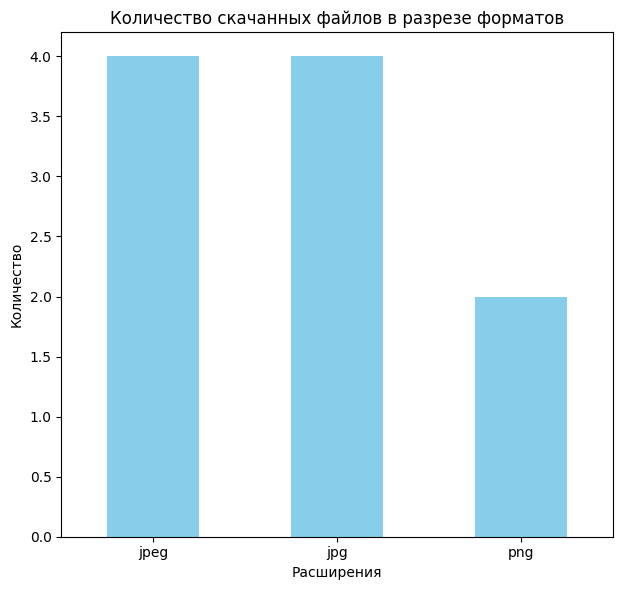

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from urllib.parse import urlparse
import os

df = pd.read_csv('error_urls.csv')

df['filename'] = df['URL'].apply(lambda x: os.path.basename(urlparse(x).path))
df['extension'] = df['filename'].apply(lambda x: x.split('.')[-1].lower())

total_images = len(df)

extension_counts = df['extension'].value_counts()


print(f"Всего скачано изобаржений: {total_images}")
print("\nРасширения файлов:")
print(extension_counts.to_string())


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
extension_counts.plot(kind='bar', color='skyblue')
plt.title('Количество скачанных файлов в разрезе форматов')
plt.xlabel('Расширения')
plt.ylabel('Количество')
plt.xticks(rotation=0)


plt.tight_layout()
plt.show()